In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

file_path = r'C:\Users\nicks\.kaggle\heart-attack-prediction-dataset\heart_attack_prediction_dataset.csv'

data_raw = pd.read_csv(file_path)

In [ ]:
data_raw.shape

(8763, 26)

In [ ]:
data_raw.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Задача:  
   Sex
    Patient ID - id (OBJECT)      
    Age - возраст  
    Sex - пол (Male/Female) бинарный (OBJECT)          
    Cholesterol - Уровень холестерина  
    Blood Pressure - Артериальное давление (systolic/diastolic) (дробь такая) (OBJECT)       
    Heart Rate - Частота сердечных сокращений  
    Diabetes - Диабет (Yes/No) бинарный
    Family History - Семейный анамнез проблем с сердцем (1: Yes, 0: No) бинарный    
    Smoking - Курительный статус (1: Smoker, 0: Non-smoker) бинарный    
    Obesity - статус ожирения (1: Obese, 0: Not obese) бинарный       
    Alcohol Consumption - уровень употребления алкоголя (None/Light/Moderate/Heavy) порядковый       
    Exercise Hours Per Week - Часы тренировок в неделю   
    Diet - Пищевые привычки пациента (Healthy/Average/Unhealthy) порядковый (OBJECT)           
    Previous Heart Problems - Предыдущие проблемы с сердцем (1: Yes, 0: No) бинарный    
    Medication Use - Использование лекарств (1: Yes, 0: No) бинарный
    Stress Level - Уровень стресса (1-10)       
    Sedentary Hours Per Day - Сидячие часы в день  
    Income - Уровень дохода пациента  
    BMI - Body Mass Index (BMI) - индекс массы тела  
    Triglycerides - уровень триглицеридов   
    Physical Activity Days Per Week - Дней физической активности в неделю  
    Sleep Hours Per Day - Часы сна в день  
    Country - страна (OBJECT)      
    Continent - континент (OBJECT)        
    Hemisphere - полушарие (OBJECT)            
    Heart Attack Risk - Риск сердечного приступа  (1: Yes, 0: No) бинарный  

Требуется предсказать признак Heart Attack Risk (1: Yes, 0: No) --> Задача классификации.

In [ ]:
data_raw['Family History']

0       0
1       1
2       0
3       1
4       1
       ..
8758    1
8759    0
8760    1
8761    0
8762    1
Name: Family History, Length: 8763, dtype: int64

Надо преобразовать все object в category.

In [ ]:
data_raw['Diet'].dtype

dtype('O')

In [ ]:
data_raw['Age'].dtype

dtype('int64')

In [ ]:
'''
data_raw['Patient ID'] = data_raw['Patient ID'].astype('category')
data_raw['Sex'] = data_raw['Sex'].astype('category')
data_raw['Blood Pressure'] = data_raw['Blood Pressure'].astype('category')
data_raw['Diet'] = data_raw['Diet'].astype('category')
data_raw['Country'] = data_raw['Country'].astype('category')
data_raw['Continent'] = data_raw['Continent'].astype('category')
data_raw['Hemisphere'] = data_raw['Hemisphere'].astype('category')
'''

"\ndata_raw['Patient ID'] = data_raw['Patient ID'].astype('category')\ndata_raw['Sex'] = data_raw['Sex'].astype('category')\ndata_raw['Blood Pressure'] = data_raw['Blood Pressure'].astype('category')\ndata_raw['Diet'] = data_raw['Diet'].astype('category')\ndata_raw['Country'] = data_raw['Country'].astype('category')\ndata_raw['Continent'] = data_raw['Continent'].astype('category')\ndata_raw['Hemisphere'] = data_raw['Hemisphere'].astype('category')\n"

In [ ]:
for feature in data_raw.columns:
    if data_raw[feature].dtype == 'O':
        data_raw[feature] = data_raw[feature].astype('category')

In [ ]:
data_raw['Diet'].dtype

CategoricalDtype(categories=['Average', 'Healthy', 'Unhealthy'], ordered=False)

In [ ]:
data_raw.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
data_raw.describe(include=['category'])

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,3,20,6,2
top,AAA9246,Male,101/93,Healthy,Germany,Asia,Northern Hemisphere
freq,1,6111,8,2960,477,2543,5660


In [ ]:
data_raw.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
data_raw.index #строки

RangeIndex(start=0, stop=8763, step=1)

In [ ]:
data_raw.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [ ]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 0]

[]

Пропущенных нет

Text(0, 0.5, 'Age')

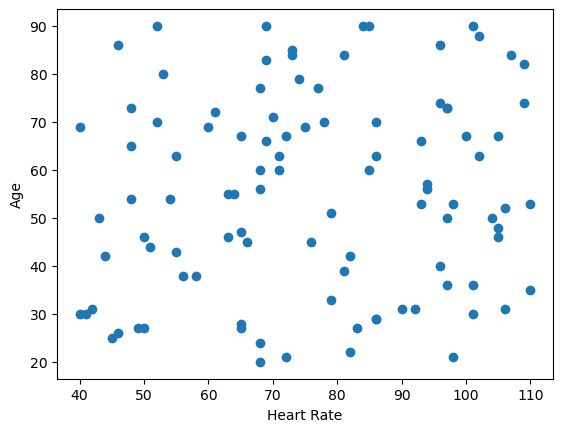

In [ ]:
plt.scatter(data_raw['Heart Rate'][:100], data_raw['Age'][:100])
plt.xlabel('Heart Rate')
plt.ylabel('Age')

<AxesSubplot:>

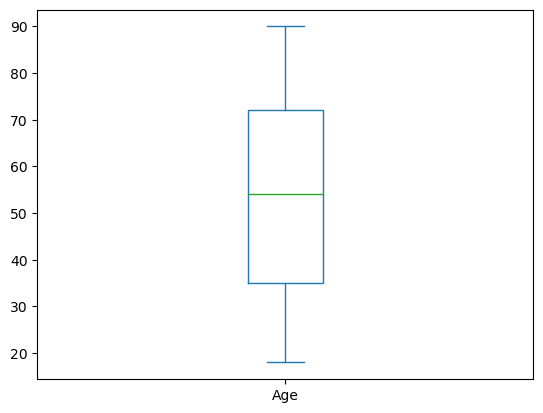

In [ ]:
data_raw['Age'].plot(kind='box')

<AxesSubplot:>

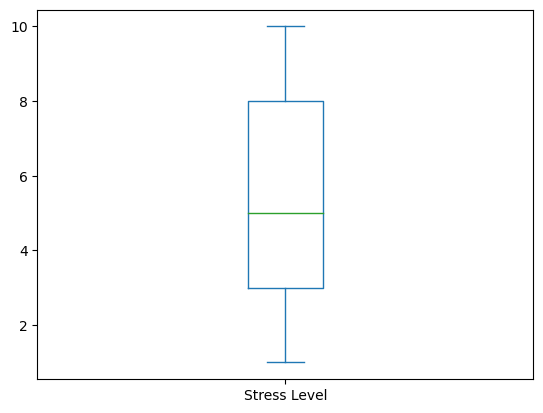

In [ ]:
data_raw['Stress Level'].plot(kind='box')

Выбросов нет.

Посмотрм зависимость уровня стресса от дней физической активности в неделю.

Text(0, 0.5, 'Stress Level')

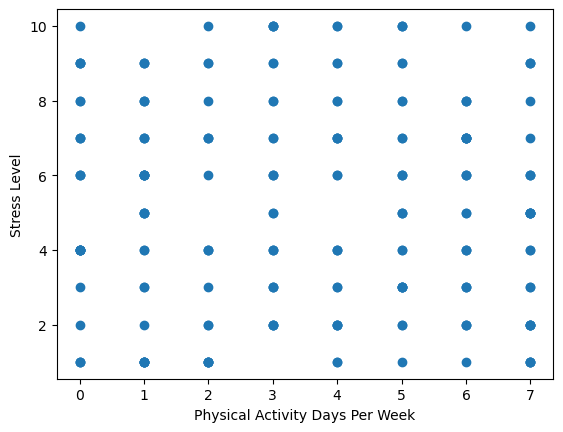

In [ ]:
x = 'Physical Activity Days Per Week'
y = 'Stress Level'
plt.scatter(data_raw[x][:200], data_raw[y][:200])
plt.xlabel(x)
plt.ylabel(y)

По графику мы ничего не поймём.   
Найдём средний уровень стресса для каждого количесива активных дней.

In [ ]:
avg_stress = []
unique_activity_days = data_raw['Physical Activity Days Per Week'].unique()
array_of_activity_days = unique_activity_days.tolist()
array_of_activity_days.sort()

for i in array_of_activity_days:
    filtered_data = data_raw[data_raw['Physical Activity Days Per Week'] == i]
    average_stress_level = filtered_data['Stress Level'].mean()
    avg_stress.append(average_stress_level)

In [ ]:
array_of_activity_days


[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
avg_stress

[5.565258215962442,
 5.330954504906334,
 5.30297565374211,
 5.534558180227472,
 5.537604456824512,
 5.52548656163114,
 5.549348230912477,
 5.420091324200913]

Видим, что средний уровень стресса одинаков для людей с разным количеством дней физической активности в неделю.     
Посмотрим график стресса от часов тренировки в неделю.

Text(0, 0.5, 'Stress Level')

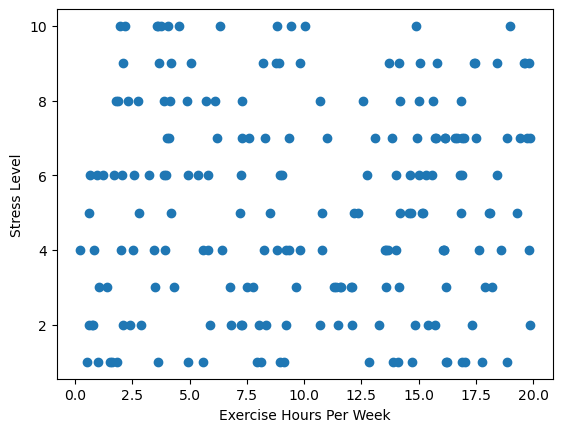

In [ ]:
#Exercise Hours Per Week Часы тренировок в неделю
x = 'Exercise Hours Per Week'
y = 'Stress Level'
plt.scatter(data_raw[x][:200], data_raw[y][:200])
plt.xlabel(x)
plt.ylabel(y)

Тоже сложно что-то сказать.

<AxesSubplot:>

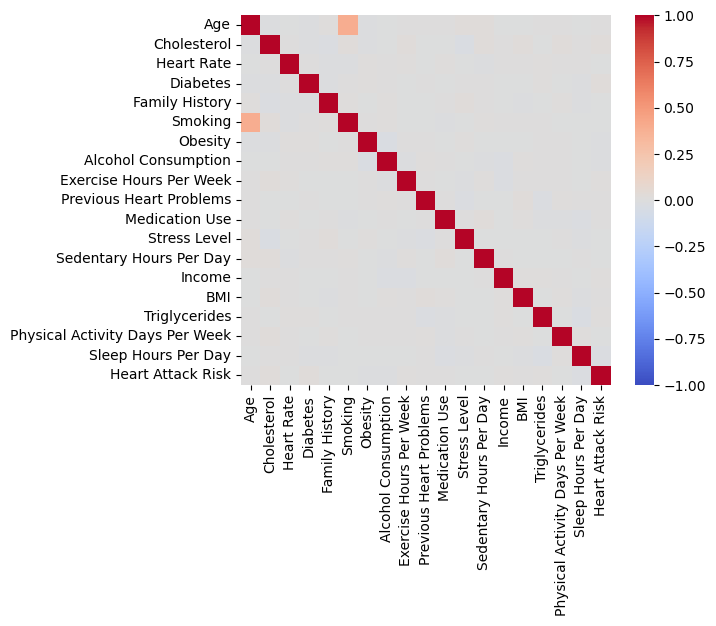

In [ ]:
corr_mat = data_raw.corr()
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

In [ ]:
data_raw['Blood Pressure'].unique()

['158/88', '165/93', '174/99', '163/100', '91/88', ..., '174/63', '102/92', '137/94', '94/76', '119/67']
Length: 3915
Categories (3915, object): ['100/100', '100/102', '100/103', '100/104', ..., '99/93', '99/94', '99/96', '99/98']

Вот сложность. Вместо этого параметра поставим два новых: числитель и знаменатель.

In [ ]:
data_raw['Blood Pressure'][0]

'158/88'

In [ ]:
type(data_raw['Blood Pressure'][0])

str

In [ ]:
data_raw['systolic'] = ''
data_raw['diastolic'] = ''

data_raw[['systolic', 'diastolic']] = data_raw['Blood Pressure'].str.split('/', expand=True)

data_raw['systolic'] = pd.to_numeric(data_raw['systolic'])
data_raw['diastolic'] = pd.to_numeric(data_raw['diastolic'])

for i in range(5):
    print(data_raw['Blood Pressure'][i], ' ')
    print(data_raw['systolic'][i], ' ')
    print(data_raw['diastolic'][i], '\n')

158/88  
158  
88 

165/93  
165  
93 

174/99  
174  
99 

163/100  
163  
100 

91/88  
91  
88 



Успешно.

In [ ]:
#4 Разбиение на обучение и тест
y = data_raw['Heart Attack Risk']
X = data_raw.drop(['Heart Attack Risk', 'Patient ID', 'Blood Pressure'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
#6 Бинаризация номинальных признаков
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['Sex', 'Alcohol Consumption', 'Diet', 'Country', 'Continent', 'Hemisphere']])

dummies = pd.DataFrame(enc.transform(X_train[['Sex', 'Alcohol Consumption', 'Diet', 'Country', 'Continent', 'Hemisphere']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)

X_train = pd.concat((X_train, dummies), axis=1).drop(['Sex', 'Alcohol Consumption', 'Diet', 'Country', 'Continent', 'Hemisphere'], axis=1)

In [ ]:
#7 Стандартизация всех признаков
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [ ]:
#8 Обучение, предсказание, ошибка (всё на трейне)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
RSS = ((y_train_predict - y_train)**2).sum()
RSS

1510.329245303254

In [ ]:
y_train_predict

array([0.32344216, 0.37031716, 0.32930154, ..., 0.46016091, 0.43281716,
       0.37617654])

Не тот алгоритм.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7, p=5)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
RSS = ((y_train_predict - y_train)**2).sum()
RSS

2014

In [ ]:
y_train_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
len(y_train)

6572

In [ ]:
1-2014/6572

0.6935483870967742

In [ ]:
#9 Тестируем модель (работаем на тесте)
# Мы сделали много преобразований с `X_train`. Чтобы нашу модель опробовать на `X_test`, надо вначале с `X_test` выполнить те же преобразования.
# Заполнение пропущенных значений:

dummies = pd.DataFrame(enc.transform(X_test[['Sex', 'Alcohol Consumption', 'Diet', 'Country', 'Continent', 'Hemisphere']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['Sex', 'Alcohol Consumption', 'Diet', 'Country', 'Continent', 'Hemisphere'], axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

#предсказание на тест
y_test_predict  = model.predict(X_test)

In [ ]:
RSS = ((y_test_predict - y_test)**2).sum()
RSS

857

In [ ]:
len(y_test)

2191

In [ ]:
1-857/2191

0.6088544043815609